## Projet 9 : Produisez une étude de marché avec Python

###  I. Pré-traitement des données

Import des librairies

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import matplotlib.pyplot as plt

Import de la disponibilité alimentaire de 2017

In [2]:
dispo_alim2017 = pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P9_Kus_Serhat\DisponibiliteAlimentaire_2017.csv')
dispo_alim2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3]:
dispo_alim2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
print(dispo_alim2017.isnull().sum())

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64


On voit qu'il n'y a pas de valeurs nulls dans la table dispo_alim2017 

In [5]:
dispo_alim2017['Symbole'].unique()

array(['S', 'Fc'], dtype=object)

In [6]:
dispo_alim2017['Description du Symbole'].unique()

array(['Données standardisées', 'Donnée calculée'], dtype=object)

Ces 2 types de symboles correspondent donc soit à une quantité(milliers de tonne) ou à un calcul(ex: Kcal/personne/jour) je juge ça inutile pour notre futur analyse je les supprimerai plus tard

Import du fichier population

In [7]:
population = pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P9_Kus_Serhat\Population_2000_2018.csv')
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [9]:
print(population.isnull().sum())

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64


Il y'a 4153 nulls dans la colonne Note, je décide donc de la supprimer.

In [10]:
population.drop(['Note'],axis=1, inplace=True)

In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
dtypes: float64(1), int64(5), object(8)
memor

On n'a donc plus de NAn dans chaque table

In [12]:
population_2017=population.loc[population['Année']==2017,:].copy()
population_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres


In [13]:
population_2017['Description du Symbole'].unique()

array(['Sources internationales sûres',
       'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées'],
      dtype=object)

In [14]:
population_2017['Symbole'].unique()

array(['X', 'A'], dtype=object)

Ici, comme avec la table de la dispo_alim, on a deux types de données : sources sûr ou autres, je pourrais les supprimer après

In [15]:
population_2017['Produit'].unique()

array(['Population-Estimations'], dtype=object)

In [16]:
population_2017['Élément'].unique()

array(['Population totale'], dtype=object)

Je voulais vérifier si j'avais toujours bien le même type de population.

#### Jointure

In [17]:
inner_join = pd.merge(dispo_alim2017,population_2017, on='Zone', how= 'inner', indicator=True)
inner_join['_merge'].unique()

['both']
Categories (1, object): ['both']

Comme nous avons que both dans la colonne '_merge' alors nous allons l'utiliser pour notre jointure

In [18]:
df_final = pd.merge(dispo_alim2017,population_2017, on='Zone', how= 'inner')
df_final.head()

,Code Domaine_x,Domaine_x,Code zone_x,Zone,Code Élément_x,Élément_x,Code Produit_x,Produit_x,Code année_x,Année_x,...,Code Élément_y,Élément_y,Code Produit_y,Produit_y,Code année_y,Année_y,Unité_y,Valeur_y,Symbole_y,Description du Symbole_y
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,...,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,...,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,...,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,...,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,...,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres


In [19]:
df_final.drop(columns=['Code Domaine_x','Domaine_x','Code zone_x','Code Élément_x','Code Produit_x','Code année_x','Symbole_x','Description du Symbole_x','Code Élément_y','Élément_y','Code Produit_y','Produit_y','Code année_y','Année_y','Unité_y','Symbole_y','Description du Symbole_y','Code zone_y','Code Domaine_y','Domaine_y'],inplace=True)

Ici j'ai supprimé les colonnes que j'ai jugé inutile à notre analyse

In [20]:
df_final.rename(columns={'Zone':'Pays','Élément_x':'Élément','Produit_x':'Produit','Année_x':'Année','Unité_x':'Unité','Valeur_x':'Valeur_produit','Valeur_y':'Population'},inplace=True)

Ici j'ai renommé les colonnes pour qu'on ait des noms compréhensible

In [21]:
df_final.head()

,Pays,Élément,Produit,Année,Unité,Valeur_produit,Population
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0,36296.113
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0,36296.113
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0,36296.113
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0,36296.113
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0,36296.113


In [22]:
df_final['Population'] = df_final['Population']*1000

Calcul pour avoir la population en million

In [23]:
df_final.head()

,Pays,Élément,Produit,Année,Unité,Valeur_produit,Population
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0,36296113.0
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0,36296113.0
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0,36296113.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0,36296113.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0,36296113.0


In [24]:
df_final = df_final.loc[df_final['Produit']=='Viande de Volailles' ,:]

Ici je fais un filtre uniquement sur la viande de volailles car nous sommes une entreprise basé uniquement sur le poulet

In [25]:
df_final.shape

(2061, 7)

In [26]:
df_final.head()

,Pays,Élément,Produit,Année,Unité,Valeur_produit,Population
651,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.0,36296113.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.0,36296113.0
653,Afghanistan,Variation de stock,Viande de Volailles,2017,Milliers de tonnes,0.0,36296113.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.0,36296113.0
655,Afghanistan,Pertes,Viande de Volailles,2017,Milliers de tonnes,2.0,36296113.0


#### Outliers

In [27]:
df_final.describe()

,Année,Valeur_produit,Population
count,2061.0,2061.000000,2.061000e+03
mean,2017.0,198.614794,4.554985e+07
std,0.0,1173.205732,1.614335e+08
min,2017.0,-125.000000,5.204500e+04
25%,2017.0,1.000000,2.884169e+06
50%,2017.0,9.440000,9.845320e+06
75%,2017.0,57.000000,3.110465e+07
max,2017.0,21914.000000,1.421022e+09


In [28]:
#les valeurs en liste
val = df_final['Valeur_produit']
val = sorted(val)

In [29]:
#Calculs du 1er quartile et 3ème quartile
q1,q3 = np.percentile(val,[25,75])
q1,q3

(1.0, 57.0)

In [30]:
#Calcul de l'interquartile
interq = q3-q1
interq

56.0

In [31]:
#Calcul de la borne inférieur
lower_bound = q1 - (1.5 * interq)
lower_bound

-83.0

In [32]:
#Calcul de la borne supérieur
upper_bound = q3 + (1.5 * interq)
upper_bound

141.0

In [33]:
outliers = [x for x in val if x <= lower_bound or x >= upper_bound]
print("Il y a ", len(outliers),"valeurs atypiques ")

Il y a  296 valeurs atypiques 


{'whiskers': [<matplotlib.lines.Line2D at 0x25da2044be0>,
 'caps': [<matplotlib.lines.Line2D at 0x25da205b2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25da2044880>],
 'medians': [<matplotlib.lines.Line2D at 0x25da205b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25da205bd00>],
 'means': []}

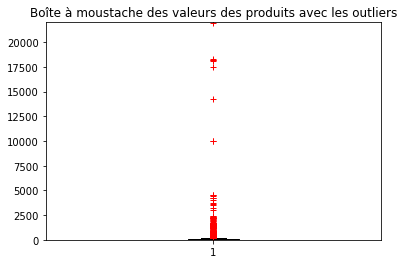

In [34]:
plt.ylim(0,22000)
plt.title("Boîte à moustache des valeurs des produits avec les outliers")
plt.boxplot(val, sym='r+')

On voit sur ce boxplot que les valeurs vraiment trop grandes(>10000) sont des sûrement des gros pays

In [35]:
out_pays = df_final.loc[df_final['Valeur_produit']> 8000]
out_pays

,Pays,Élément,Produit,Année,Unité,Valeur_produit,Population
25062,Brésil,Production,Viande de Volailles,2017,Milliers de tonnes,14201.0,2.078338e+08
25066,Brésil,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,9982.0,2.078338e+08
25068,Brésil,Nourriture,Viande de Volailles,2017,Milliers de tonnes,9982.0,2.078338e+08
35872,"Chine, continentale",Production,Viande de Volailles,2017,Milliers de tonnes,18236.0,1.421022e+09
35876,"Chine, continentale",Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,18161.0,1.421022e+09
35881,"Chine, continentale",Nourriture,Viande de Volailles,2017,Milliers de tonnes,17518.0,1.421022e+09
56144,États-Unis d'Amérique,Production,Viande de Volailles,2017,Milliers de tonnes,21914.0,3.250848e+08
56148,États-Unis d'Amérique,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,18266.0,3.250848e+08
56152,États-Unis d'Amérique,Nourriture,Viande de Volailles,2017,Milliers de tonnes,18100.0,3.250848e+08


Ici ce sont donc les pays les plus gros en terme de population, ou en terme de valeur des produits, je ne les suppprime pas mais on n'exportera sûrement pas dans ces pays là

#### Pivot et traitement

In [36]:
df_pivot = pd.pivot_table(df_final, values = 'Valeur_produit', index = ['Pays'],columns=['Élément'],fill_value=0)

Ici j'ai fait pivoter la table de sorte à ce qu'on ait les éléments en colonnes et les pays en lignes

In [37]:
df_pivot.rename(columns={'Alimentation pour touristes':'alim_touriste','Aliments pour animaux':'alim_animaux','Autres utilisations (non alimentaire)':'Autres utilisations','Disponibilité alimentaire (Kcal/personne/jour':'dispo_alim(kcal/p/j)','Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_alim_qté(kg/p/j)','Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mg(g/p/j)','Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot(g/p/j)','Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim(Kcal/p/j)'},inplace=True)

In [38]:
df_pivot.head()

Élément,alim_touriste,alim_animaux,Autres utilisations,dispo_alim(Kcal/p/j),dispo_alim_qté(kg/p/j),dispo_mg(g/p/j),dispo_prot(g/p/j),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,5,1.53,0.33,0.54,57,0,29,55,2,28,0,0,0,0
Afrique du Sud,0,0,0,143,35.69,9.25,14.11,2118,63,514,2035,83,1667,0,0,0,0
Albanie,0,0,0,85,16.36,6.45,6.26,47,0,38,47,0,13,0,0,0,4
Algérie,0,0,0,22,6.38,1.50,1.97,277,0,2,264,13,275,0,0,0,0
Allemagne,0,0,0,71,19.47,4.16,7.96,1739,646,842,1609,0,1514,-38,0,167,-29


Je me suis intéressé aux premières colonnes car j'y ai vu plusieurs 0

In [39]:
filtre = df_pivot[df_pivot['alim_animaux'] != 0]
filtre.shape

(0, 17)

In [40]:
filtre1 = df_pivot[df_pivot['alim_touriste'] != 0]
filtre1.shape

(18, 17)

In [41]:
filtre2 = df_pivot[df_pivot['Autres utilisations'] != 0]
filtre2.shape

(20, 17)

Nous n'avons pas de pays qui utilisent la viande de volailles en tant qu'aliments pour animaux donc je peux supprimer cette colonne pour ce qui est des deux autres colonnes j'ai décidé de les garder

In [42]:
df_pivot.drop(columns='alim_animaux', inplace=True)

In [43]:
df_pivot.shape

(172, 16)

### Analyse en composant principale (ACP)

Notre but ici va de réduire le nombre de variables : c'est le but de l'ACP. Le but principal est de voir les liaisons entre les variables.
On va voir aussi les différences entre les individus

In [44]:
df_acp = df_pivot

In [45]:
#nombre de composantes à calculer
n_comp = 6

In [46]:
X = df_acp.values
names = df_acp.index
features = df_pivot.columns

In [47]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [48]:
acp = decomposition.PCA(n_components=n_comp)
acp.fit(X_scaled)

PCA(n_components=6)

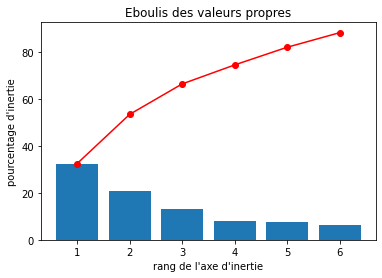

In [49]:
display_scree_plot(acp)

Plus de 50% de la variance des données est expliquée par ces deux composantes

On a donc ici l'éboulis des valeurs propres : on voit qu'avec les axes 1 et 2, nous avons plus de 50% d'inertie. Il est quand même intéressant de voir les autres axes.

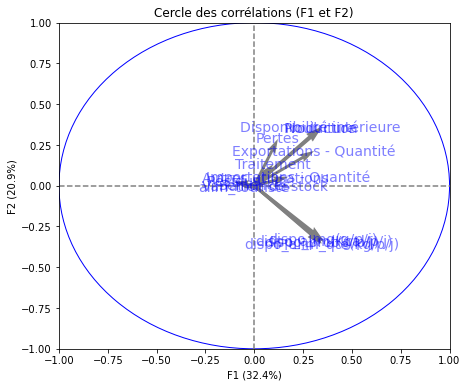

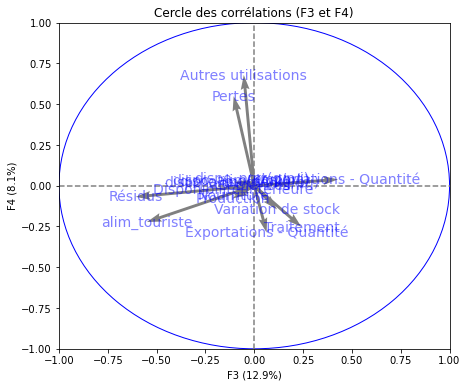

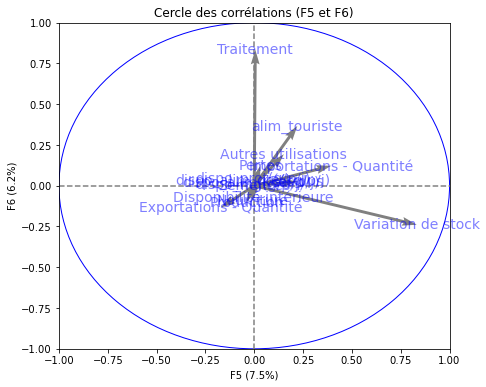

In [50]:
pcs = acp.components_
display_circles(pcs, n_comp, acp, [(0,1),(2,3),(4,5)], labels = np.array(features))

Pour F1 et F2, on peut voir que la disponibilité intérieur est corrélé avec la nourriture que ce soit pour F1 ou F2, ou encore la disponibilité en matière grasse avec la disponibilité alimentaire pour F1 et anticorrélé avec F2.
Pour F3 et F4, on voit que les autres utilisations et les pertes sont fortement corrélés avec F4 tout comme les résidus avec l'alimentation pour touriste qui sont anticorrélés avec F3. La variation de stock, ainsi que l'exportation et le traitement sont anticorrélés avec F4 mais peu corrélés avec F3 .
Pour F5 et F6, on peut voir que traitement est fortement corrélé avec F6, la variation de stock est fortement corrélé avec F5.

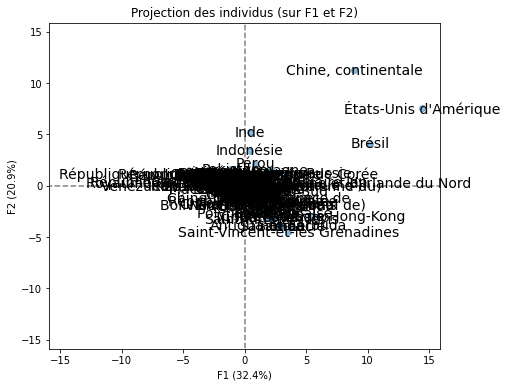

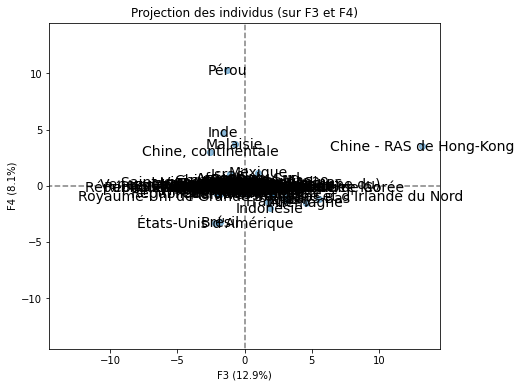

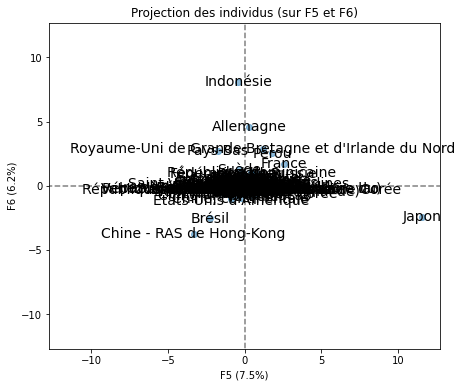

In [51]:
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, acp, [(0,1),(2,3),(4,5)], labels = np.array(names), alpha = 0.5)

plt.show()

In [71]:
X=df_pivot.values
X_norm = preprocessing.scale(X)
X_norm.shape

(172, 16)

In [73]:
#pca2 = decomposition.PCA(n_components = 6)
acp.fit(X_norm)
X_trans = acp.transform(X_norm)

### Classification Ascendante Hiérarchique(CAH)

La classification ascendanre hiérarchique est une technique statistique qui consiste à partitionner une population en différente classes ou groupe. Le CAH va donc construire un dendrogramme en fonction de nos données pour réaliser des clusters. En découpant le dendrogramme on va choisir un nombre de cluster par la suite pour faire notre heatmap

In [52]:
from scipy.cluster.hierarchy import linkage, fcluster

In [53]:
X = df_pivot.values
names = df_pivot.index


In [54]:
X.shape

(172, 16)

In [55]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [56]:
Z = linkage(X_scaled, 'ward')

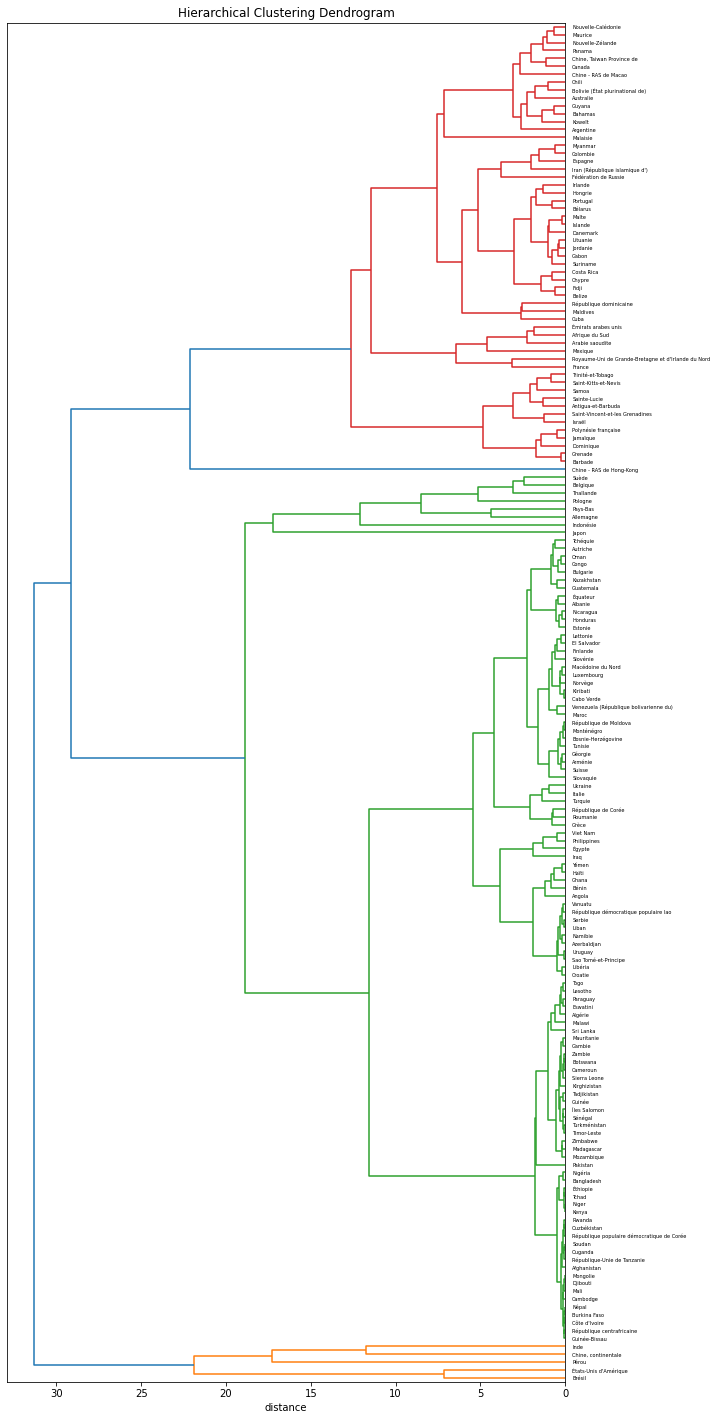

In [57]:
plot_dendrogram(Z, names)

Sur ce dendrogramme, on peut voir que les liens mènent à plusieurs points : j'ai donc choisi de couper le dendrogramme en 4 groupe (bleu-orange,bleu-vert,bleu-bleu(Hong-Kong) et bleu-jaune.

In [58]:
clusters = fcluster(Z, 4, criterion='maxclust')

In [59]:
clusters

array([2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 3, 3, 4, 3, 3, 1, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       1, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2], dtype=int32)

In [60]:
result = pd.DataFrame({'cluster':clusters, 'Pays':names })
result

,cluster,Pays
0,2,Afghanistan
1,3,Afrique du Sud
2,2,Albanie
3,2,Algérie
4,2,Allemagne
...,...,...
167,3,Émirats arabes unis
168,2,Équateur
169,1,États-Unis d'Amérique
170,2,Éthiopie


Ici j'ai fait correspondre chaque pays à un cluster, ci-dessous la jointure avec notre dataframe "df_pivot"

In [61]:
merge = pd.merge(result,df_pivot, on = 'Pays', how='inner')
merge

,cluster,Pays,alim_touriste,Autres utilisations,dispo_alim(Kcal/p/j),dispo_alim_qté(kg/p/j),dispo_mg(g/p/j),dispo_prot(g/p/j),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,2,Afghanistan,0,0,5,1.53,0.33,0.54,57,0,29,55,2,28,0,0,0,0
1,3,Afrique du Sud,0,0,143,35.69,9.25,14.11,2118,63,514,2035,83,1667,0,0,0,0
2,2,Albanie,0,0,85,16.36,6.45,6.26,47,0,38,47,0,13,0,0,0,4
3,2,Algérie,0,0,22,6.38,1.50,1.97,277,0,2,264,13,275,0,0,0,0
4,2,Allemagne,0,0,71,19.47,4.16,7.96,1739,646,842,1609,0,1514,-38,0,167,-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3,Émirats arabes unis,0,0,147,43.47,9.25,14.80,412,94,433,412,0,48,0,0,0,-26
168,2,Équateur,0,0,83,19.31,6.35,6.15,341,0,0,324,17,340,0,0,0,-1
169,1,États-Unis d'Amérique,0,89,219,55.68,14.83,19.93,18266,3692,123,18100,0,21914,0,0,77,80
170,2,Éthiopie,0,0,0,0.13,0.03,0.04,14,0,1,14,1,14,0,0,0,0


In [62]:
statcluster = merge.groupby(clusters).mean()
statcluster

,cluster,alim_touriste,Autres utilisations,dispo_alim(Kcal/p/j),dispo_alim_qté(kg/p/j),dispo_mg(g/p/j),dispo_prot(g/p/j),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
1,1,0.000,174.400000,110.200000,26.346000,7.806000,9.406000,10318.600000,1699.200000,127.600000,9797.800000,330.800000,11872.200000,-0.200000,0.0,15.600000,-17.800000
2,2,0.000,0.390909,38.890909,10.975182,2.460455,3.911455,265.018182,53.945455,66.263636,254.600000,5.163636,268.627273,-2.718182,0.0,7.500000,15.909091
3,3,0.625,9.875000,139.017857,37.217679,9.288393,12.951964,640.464286,49.142857,114.035714,612.714286,12.464286,587.464286,-0.714286,0.0,5.464286,11.803571
4,4,-18.000,32.000000,210.000000,53.510000,12.700000,22.260000,280.000000,663.000000,907.000000,391.000000,0.000000,24.000000,-125.000000,0.0,0.000000,-12.000000


J'ai donc fait la moyenne de nos variables correspondant à chaque cluster, on peut voir sur cette dataframe que pour le cluster 1, nos moyennes sont disproportionnés par rapport aux autres données

In [63]:
import seaborn as sns

<AxesSubplot:>

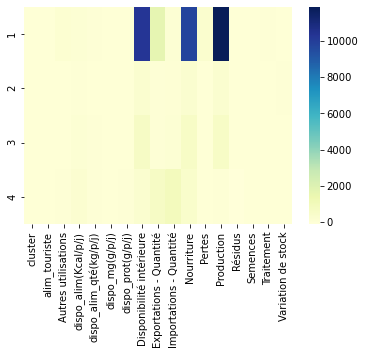

In [64]:
sns.heatmap(statcluster,cmap="YlGnBu")

Avec Seaborn, j'ai obtenu cette heatmap. Ce qu'on peut voir, c'est que le cluster 1 est fortement corrélé avec la disponibilité intérieur, la nourriture et avec la production. Il est un peu corrélé avec l'exportation aussi.
Pour ce qui est du cluster 4, on voit qu'il est un peu corrélé avec l'exportation et l'importation.
Pour le cluster 3, il est corrélé avec la disponibilité intérieur, la nourriture et les pertes.
Donc le cluster qui nous intéresse le plus est le cluster 2 car ils n'importent pas beacoup et ils ont peu de disponibilités intérieur.

In [65]:
result_count_cah=merge.groupby(['cluster'])['cluster'].count()
result_count_cah

cluster
1      5
2    110
3     56
4      1
Name: cluster, dtype: int64

En regardant de plus près le nombre de pays par cluster, on peut voir qu'il n'y a qu'un seul pays pour le cluster 4. Je vais refaire le CAH avec 3 clusters.

In [66]:
clusters_cah_final = fcluster(Z, 3, criterion='maxclust')

In [67]:
result_cah = pd.DataFrame({'cluster':clusters_cah_final, 'Pays':names })

In [68]:
merge_cah = pd.merge(result_cah,df_pivot, on = 'Pays', how='inner')

In [78]:
statcluster_final = merge.groupby(clusters_cah_final).mean()

<AxesSubplot:>

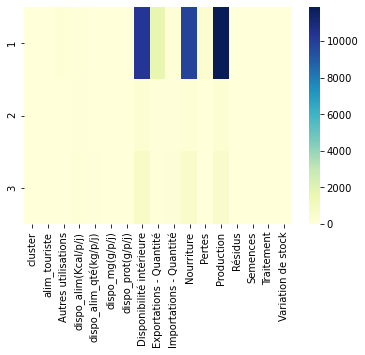

In [79]:
sns.heatmap(statcluster_final,cmap="YlGnBu")

Nous avons donc 3 clusters, le cluster 4 précédent s'étant ajouté au cluster 3.

In [77]:
result_count_cah_final=merge_cah.groupby(['cluster'])['cluster'].count()
result_count_cah_final

cluster
1      5
2    110
3     57
Name: cluster, dtype: int64

#### Projections des individus avec l'ACP.

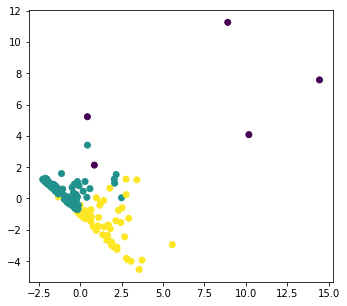

In [99]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1], c=clusters_cah_final)

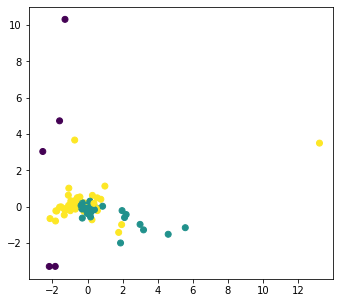

In [100]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,2], X_trans[:,3], c=clusters_cah_final)

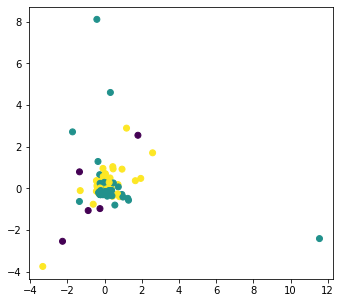

In [101]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,4], X_trans[:,5], c=clusters_cah_final)

Donc pour exporter nos poulets, je vais lister les pays du cluster 2 :

In [82]:
clust2 = result[result['cluster'] == 2]
clust2

,cluster,Pays
0,2,Afghanistan
2,2,Albanie
3,2,Algérie
4,2,Allemagne
5,2,Angola
...,...,...
165,2,Zimbabwe
166,2,Égypte
168,2,Équateur
170,2,Éthiopie


### K-means

K-means est un algorithme de clustering qui permet de regrouper des clusters avec le centre de gravités d'un groupe (ou centroïdes) 
On va donc choisir un centroïde d'un nuage "au hasard" et par la suite on va calculer le centre de gravité de chaque groupe et on voit qu'il change, on va donc bouger le premier centroïde sur le deuxième et on refait le même calculer jusqu'à ce que l'algorithme converge(plus rien ne bouge en calculant encore une fois).

#### Silhouette

Populating the interactive namespace from numpy and matplotlib


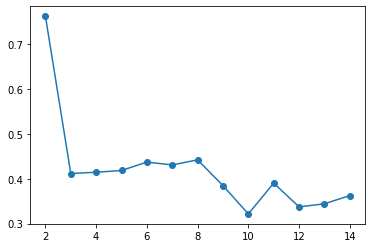

In [84]:
%pylab inline
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range(2,15):
    cls = cluster.KMeans(n_clusters=num_clusters,
                        n_init=1, init='k-means++')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 15), silhouettes, marker='o')

Grâce à ce coefficient de silhouette, on peut voir que la valeur maximale est pour 2 cluster or 2 est trop petit, je décide donc d'en prendre 4 pour essayer, je changerai plus tard si je vois que c'est mieux.

#### K-Means

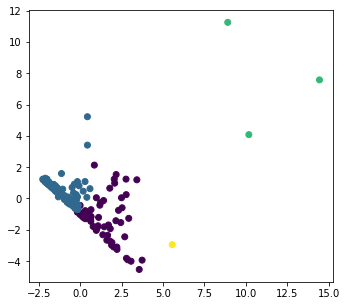

In [85]:
fig = plt.figure(figsize=(12,5))
cls = cluster.KMeans(n_clusters=4)
cluster2 = cls.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls.labels_)

Sur cette première projection d'individus sûr F1 et F2, on peut voir les 3 points qui representent sûrement les Etats-Unis, la Chine et le Brésil.
Pour le reste on a un point qui se balade tout seul en bas du graphique, donc on peut sûrement faire avec 3 clusters et non 4

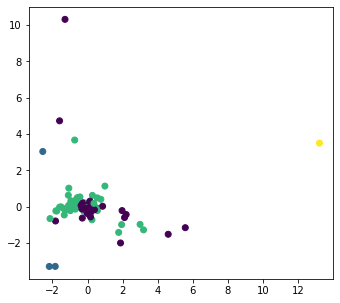

In [86]:
fig = plt.figure(figsize=(12,5))
cls = cluster.KMeans(n_clusters=4)
cluster2 = cls.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,2], X_trans[:,3], c=cls.labels_)

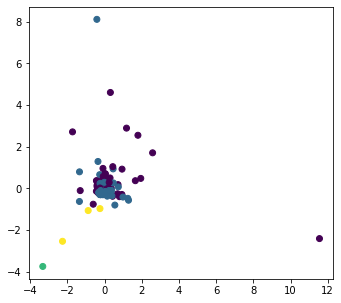

In [87]:
fig = plt.figure(figsize=(12,5))
cls = cluster.KMeans(n_clusters=4)
cluster2 = cls.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,4], X_trans[:,5], c=cls.labels_)

In [88]:
df_pivot_copy = df_pivot.copy()

In [90]:
df_pivot_copy['labels']= cluster2.labels_
clusters_kmeans=cluster2.labels_
statcluster_kmeans = df_pivot.groupby(clusters_kmeans).mean()
statcluster_kmeans

Élément,alim_touriste,Autres utilisations,dispo_alim(Kcal/p/j),dispo_alim_qté(kg/p/j),dispo_mg(g/p/j),dispo_prot(g/p/j),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,0.500000,22.266667,135.250000,36.212667,8.982667,12.719000,717.650000,97.533333,150.133333,669.883333,18.283333,692.383333,-3.583333,0.0,10.250000,27.233333
1,0.046296,0.398148,37.194444,10.503611,2.370648,3.702685,251.324074,26.287037,43.768519,236.240741,10.925926,239.944444,-1.148148,0.0,4.777778,6.092593
2,-18.000000,32.000000,210.000000,53.510000,12.700000,22.260000,280.000000,663.000000,907.000000,391.000000,0.000000,24.000000,-125.000000,0.0,0.000000,-12.000000
3,0.000000,29.666667,160.666667,38.680000,11.613333,13.190000,15469.666667,2830.333333,192.666667,15200.000000,214.333333,18117.000000,-0.333333,0.0,26.000000,10.000000


In [91]:
countcluster_kmeans=df_pivot_copy.groupby(['labels'])['labels'].count()
countcluster_kmeans

labels
0     60
1    108
2      1
3      3
Name: labels, dtype: int64

<AxesSubplot:xlabel='Élément'>

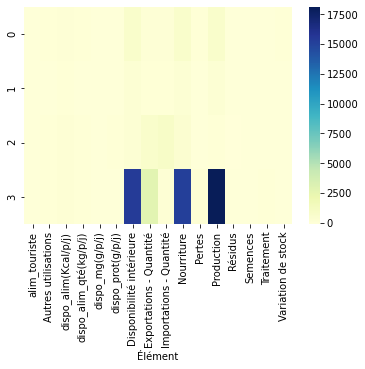

In [92]:
sns.heatmap(statcluster_kmeans,cmap="YlGnBu")

Cette heatmap correspond donc  à la heatmap du CAH, le cluster ayant les couleurs les plus foncés sont celles qui sont le plus corrélés. Vérifions comme avec le CAH le nombre de pays par cluster pour bien justifier le choix de nos cluster.

#### Projection des individus avec 3 clusters

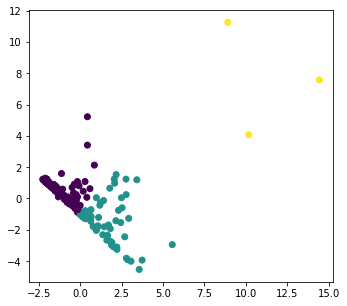

In [93]:
fig = plt.figure(figsize=(12,5))
cls_f = cluster.KMeans(n_clusters=3)
cluster2_f = cls_f.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls_f.labels_)

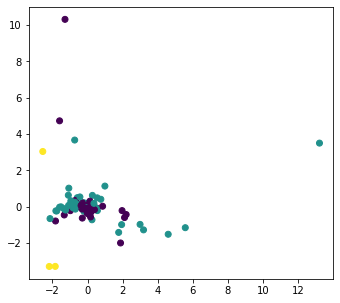

In [94]:
fig = plt.figure(figsize=(12,5))
cls_f = cluster.KMeans(n_clusters=3)
cluster2_f = cls_f.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,2], X_trans[:,3], c=cls_f.labels_)

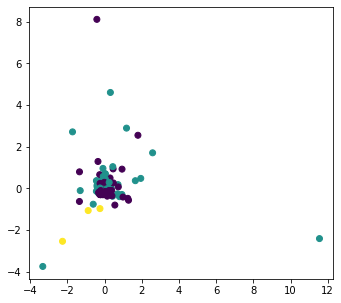

In [95]:
fig = plt.figure(figsize=(12,5))
cls_f = cluster.KMeans(n_clusters=3)
cluster2_f = cls_f.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,4], X_trans[:,5], c=cls_f.labels_)

In [96]:
df_pivot_copy_kmeans = df_pivot.copy()

In [97]:
df_pivot_copy_kmeans['labels']= cluster2_f.labels_
clusters_kmeans_f=cluster2_f.labels_
statcluster_kmeans_f = df_pivot.groupby(clusters_kmeans_f).mean()
statcluster_kmeans_f

Élément,alim_touriste,Autres utilisations,dispo_alim(Kcal/p/j),dispo_alim_qté(kg/p/j),dispo_mg(g/p/j),dispo_prot(g/p/j),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,0.116071,8.044643,38.785714,10.921250,2.476339,3.850268,260.535714,25.392857,45.803571,235.428571,13.366071,246.125000,-1.107143,0.0,4.607143,5.982143
1,0.070175,8.947368,140.315789,37.499649,9.304211,13.229123,724.596491,114.210526,166.877193,697.017544,13.684211,700.263158,-5.964912,0.0,10.789474,28.245614
2,0.000000,29.666667,160.666667,38.680000,11.613333,13.190000,15469.666667,2830.333333,192.666667,15200.000000,214.333333,18117.000000,-0.333333,0.0,26.000000,10.000000


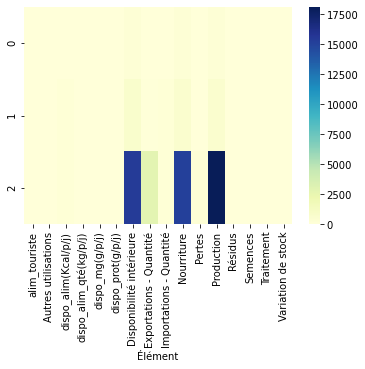

In [109]:
heatmap_kmeans = sns.heatmap(statcluster_kmeans_f,cmap="YlGnBu")
fig = heatmap_kmeans.get_figure()
fig.savefig('heatmap_kmeans.png')

### Conculsion

On peut voir que les deux heatmaps sont très ressemblantes, pour moi il n'y a pas de différences entre les 2 méthodes de clustering cependant, je trouve que le CAH est beaucoup plus adapté à notre jeu de données.
De plus j'aurais pu rajouté d'autres données(stabilité politique, PIB, ou encore population que je n'ai pas pu utilisé faute de temps, mais comme on a la méthode pour réaliser les clustering, il suffira d'ajouter des données et analyser encore une fois.